# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# read the titanic train.csv file into a dataframe
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
# show the percentage of the passengers that boarded at different ports
df_train['Embarked'].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

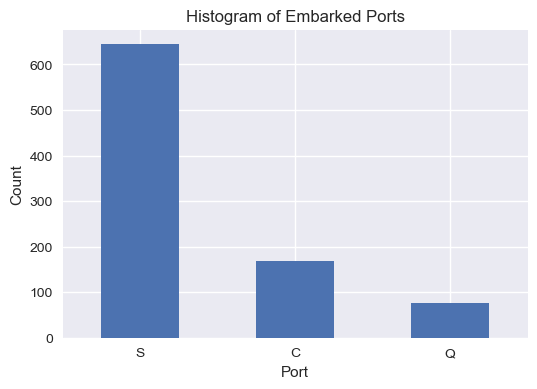

In [83]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below

plt.style.use('seaborn-v0_8')

df_train['Embarked'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Histogram of Embarked Ports')
plt.xlabel('Port')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [84]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.

df_train.groupby('Survived')['Sex'].value_counts(normalize=True)
# df_train.groupby('Sex')['Survived'].value_counts(normalize=True)

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: proportion, dtype: float64

Text(0, 0.5, 'Ticket Price')

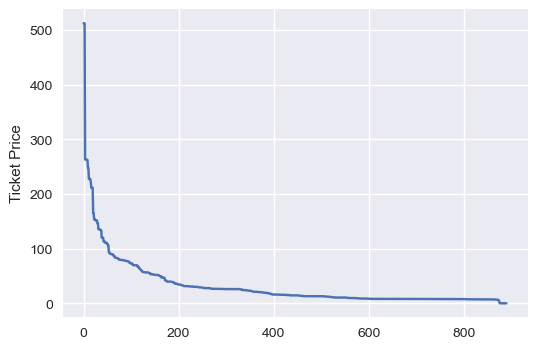

In [85]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
df_fare = df_train.sort_values(by='Fare', ignore_index = True, ascending= False)
df_fare['Fare'].plot(figsize=(6,4))
plt.ylabel('Ticket Price')



![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



Text(0, 0.5, 'Fare')

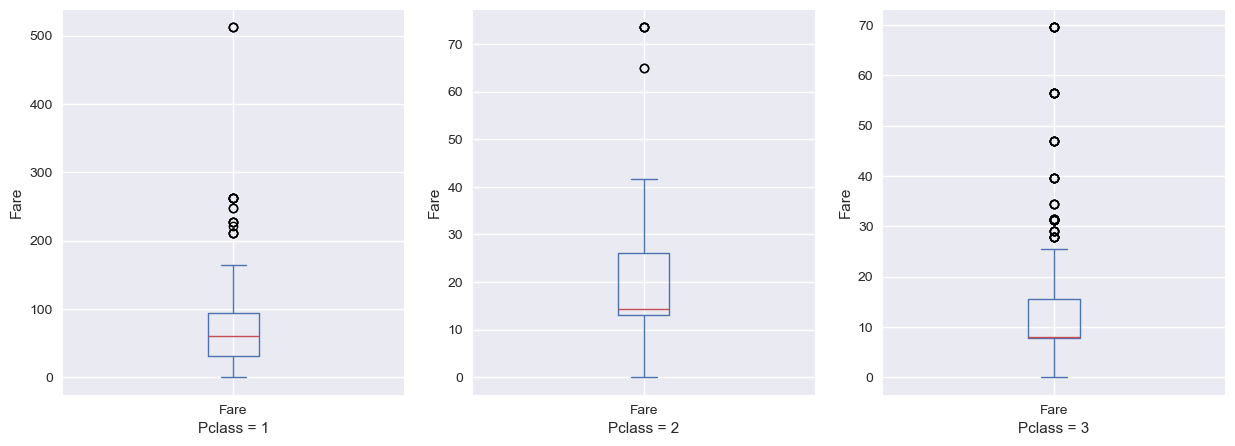

In [86]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
fig, ax = plt.subplots(1, 3, figsize=(15,5))

df_train[df_train['Pclass']==1]['Fare'].plot.box(ax=ax[0]).set_xlabel("Pclass = 1")
ax[0].set_ylabel('Fare')

df_train[df_train['Pclass']==2]['Fare'].plot.box(ax=ax[1]).set_xlabel("Pclass = 2")
ax[1].set_ylabel('Fare')

df_train[df_train['Pclass']==3]['Fare'].plot.box(ax=ax[2]).set_xlabel("Pclass = 3")
ax[2].set_ylabel('Fare')

![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [87]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function

df_train.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

People in Pclass 3 had the highest survival rate of 0.7576

<Axes: xlabel='Pclass,Survived'>

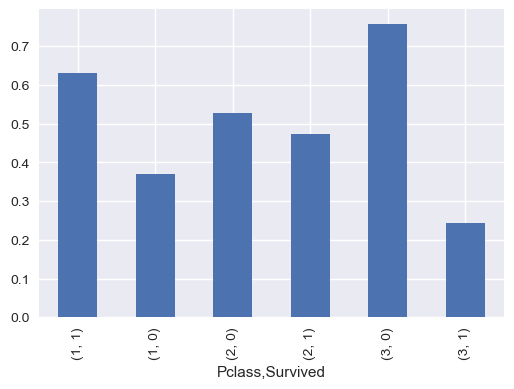

In [88]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
df_train.groupby('Pclass')['Survived'].value_counts(normalize=True).plot(kind = 'bar',figsize = (6,4))



![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
